##**Part 1: Getting started [2 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? 284807 **[0.1]**
* What features in the dataset are present aside from the 28 main features?  Time, Amount, Class **[0.1]**
* Which column contains the targets? Class **[0.1]**
* What is the meaning of target values? 0 means not fraud, 1 means fraud **[0.1]**

In [ ]:
pip install wget

In [ ]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

In [ ]:
!tar -zxvf creditcard.tar.gz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [2]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
print("rows:", len(df))
print(df.columns[0],df.columns[-2],df.columns[-1])

rows: 284807
Time Amount Class


In [4]:
print(df['Class'].unique())

[0 1]


It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? 

Class 0: 99.827251436938, Class 1: 0.1727485630620034 % **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case?

This data is unbalanced. Because Class 0 dataset has much larger sample size than Class 1 has.**[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? 

Because if we use a imbalance data to build and train model, the prediction results based on the model will have a bias. And the bias will more prefer the class which has a larger sample size. And the model will predict to the class with fewer sample size less or even none. This will lead to the one which needed to be classified is classified into a wrong class. **[0.5]**
* What metrics should we use to evaluate a model in such cases **[0.2]**

The metric of F1-score should be used. F1-score is a balanced measure of accuracy giving equal importance to recall and precision. In such case, we have unbalanced data, the result will prefer the 0 class. Then we will have more False Negative results. So to have a fair metric, we need a metric that can balance between recall(TP/(TP+FN)) and precision(TP/(TP+FP)). As a result, F1-score is a good metric


In [5]:
number_0, number_1 = df['Class'].value_counts()
total_0_1 = df['Class'].count()

print('The precentage of Class 0 is', 100 * number_0 / total_0_1, '%')
print('The precentage of Class 1 is', 100 * number_1 / total_0_1, '%')

The precentage of Class 0 is 99.827251436938 %
The precentage of Class 1 is 0.1727485630620034 %


Next, split the dataset into a training (65%), validation (20%) and testing set (15%). Set the random state to 40. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [6]:
### Split the data  ###

X_train, X_val, X_test, y_train, y_val, y_test = 0, 0, 0, 0, 0, 0

data = df.drop(columns = ['Class', 'Time', 'Amount'])
target = df['Class']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.15, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 20/(65+20), random_state=0)

Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

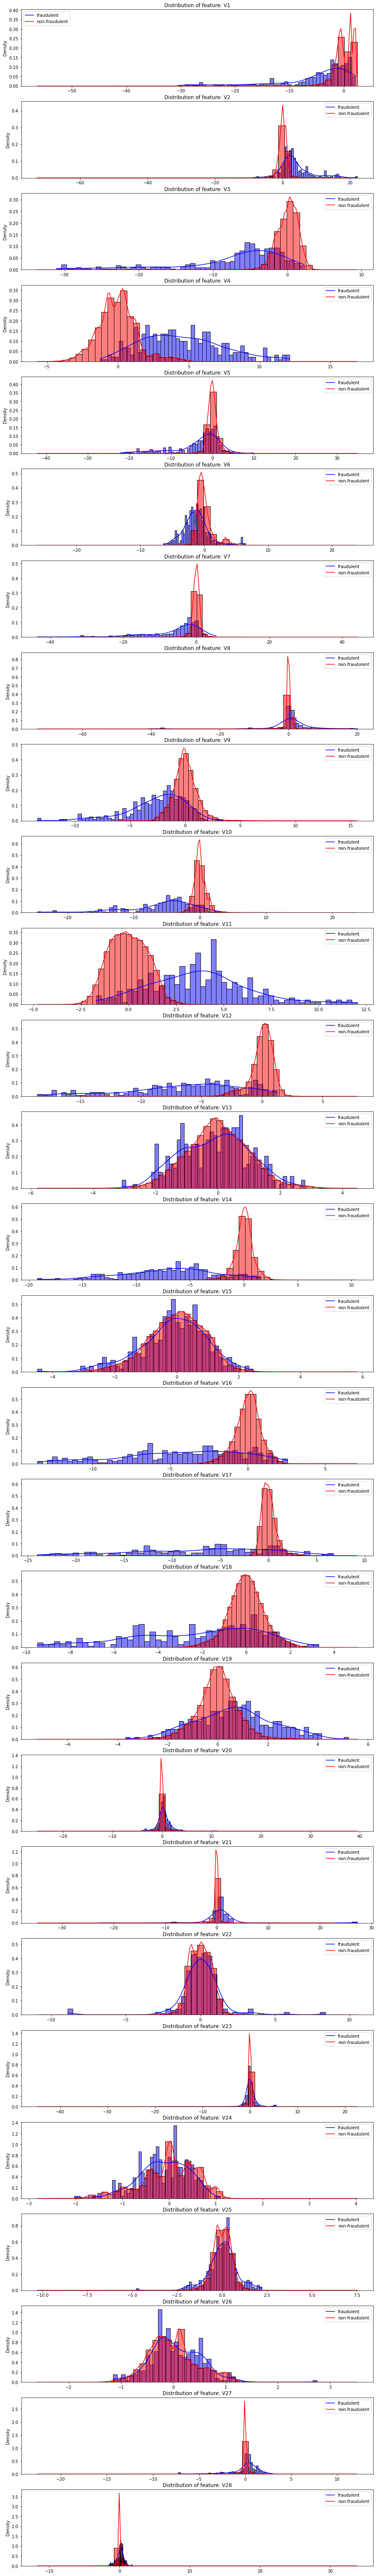

In [7]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

We can distinguish fraudulent data from the non-fraudulent data easily based on some of the graphs.

Feature V3, V4, V9, V10, V11, V12, V14, V16, V17, V18 are useful, the graph corressponding to each feature can distinguish each class obviously. 
The peaks for the two classes are separate and the probability for fraudulent data is lower than for non-fraudulent data.

However, for feature V8  V13  V15  V22  V23  V24  V25  V26,both classes' distributions are close in their graphs, we can't distinguish these two classes from each other easily.

## **Part 2: One Gaussian model with Single feature: [2 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.3]**
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  7. Report Precision, Recall and F1 score on both training and validation set in a table using the threshold you found in previous step. 
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.3]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian **only on non-fraudulent transactions in the training set** in step 1 (instead of all the transactions).
 3. Compare your results from parts 2a and 2b in a table (for both training and validation set). **[0.2]**
 4. Are these results different or similar? Why?**[0.5]**


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_score, recall_score, f1_score

a

In [9]:
gm = GaussianMixture(n_components = 1, covariance_type = 'full',  random_state = 0)

AUC_train = []
AUC_val = []

for i in range(28):
    feature_train = X_train.iloc[:,i].values.reshape(-1,1)
    feature_val = X_val.iloc[:,i].values.reshape(-1,1)
    gm.fit(feature_train)
    
    p_gm_train = gm.score_samples(feature_train)
    p_gm_val = gm.score_samples(feature_val)
    
    fpr_gm_train, tpr_gm_train, threshold_train = roc_curve(y_train, 1 - p_gm_train)
    fpr_gm_val, tpr_gm_val, threshold_val = roc_curve(y_val, 1 - p_gm_val)
    
    auc_train = auc(fpr_gm_train, tpr_gm_train)
    auc_val = auc(fpr_gm_val, tpr_gm_val)
    
    AUC_train.append(auc_train)
    AUC_val.append(auc_val)

In [10]:
# Table
table = pd.DataFrame({'Feature': features, 'Train AUC':AUC_train, 'Val AUC': AUC_val})
table

,Feature,Train AUC,Val AUC
0,V1,0.711243,0.698962
1,V2,0.851462,0.827617
2,V3,0.883859,0.829753
3,V4,0.891457,0.888615
4,V5,0.770754,0.763331
5,V6,0.732271,0.734432
6,V7,0.863157,0.869406
7,V8,0.768071,0.831053
8,V9,0.795338,0.832820
9,V10,0.915403,0.898947


Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set

In [11]:
table.sort_values(by = 'Val AUC', ascending = False)

# So the best 3 features are V14, V17, V12

,Feature,Train AUC,Val AUC
13,V14,0.949422,0.955077
16,V17,0.923430,0.942272
11,V12,0.912076,0.926948
15,V16,0.895938,0.918978
10,V11,0.897508,0.907228
9,V10,0.915403,0.898947
3,V4,0.891457,0.888615
6,V7,0.863157,0.869406
20,V21,0.819126,0.861814
8,V9,0.795338,0.832820


Make a prediction based on a model's scores: If the score_samples is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using sklearn.metrics.f1_score. [0.5]

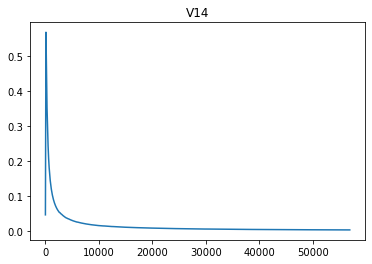

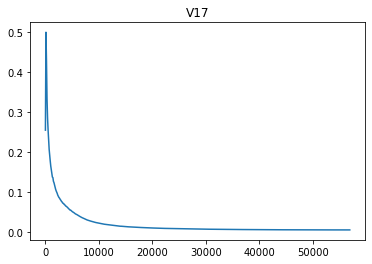

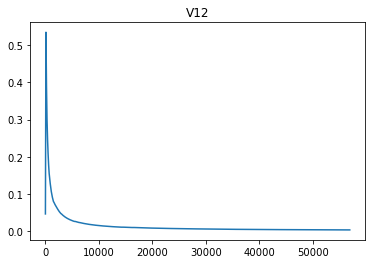

In [12]:
# To find a faster way, we can find a range for the best value
# V14
t_F1_V14 = []
t_train_V14 = X_train['V14'].values.reshape(-1,1)
t_val_V14 = X_val['V14'].values.reshape(-1,1)

gm.fit(t_train_V14)

p_gm_t_val_V14 = gm.score_samples(t_val_V14)
for i in range(1, len(X_val['V14']),100):
    t_tr = sorted(p_gm_t_val_V14)[i]
    t_f1_V14 = f1_score(y_val, p_gm_t_val_V14 <= t_tr)
    t_F1_V14.append(t_f1_V14)
plt.plot(range(1, len(X_val['V14']),100),t_F1_V14)
plt.title('V14')
plt.show()


# V17
t_F1_V17 = []
t_train_V17 = X_train['V17'].values.reshape(-1,1)
t_val_V17 = X_val['V17'].values.reshape(-1,1)

gm.fit(t_train_V17)

p_gm_t_val_V17 = gm.score_samples(t_val_V17)
for i in range(1, len(X_val['V17']),100):
    t_tr = sorted(p_gm_t_val_V14)[i]
    t_f1_V17 = f1_score(y_val, p_gm_t_val_V17 <= t_tr)
    t_F1_V17.append(t_f1_V17)
plt.plot(range(1, len(X_val['V17']),100),t_F1_V17)
plt.title('V17')
plt.show()

# V12
t_F1_V12 = []
t_train_V12 = X_train['V12'].values.reshape(-1,1)
t_val_V12 = X_val['V12'].values.reshape(-1,1)

gm.fit(t_train_V12)

p_gm_t_val_V12 = gm.score_samples(t_val_V12)
for i in range(1, len(X_val['V12']),100):
    t_tr = sorted(p_gm_t_val_V12)[i]
    t_f1_V12 = f1_score(y_val, p_gm_t_val_V12 <= t_tr)
    t_F1_V12.append(t_f1_V12)
plt.plot(range(1, len(X_val['V12']),100),t_F1_V12)
plt.title('V12')
plt.show()

In [13]:
t_F1_V14 = pd.Series(t_F1_V14)
print(t_F1_V14[t_F1_V14.values == max(t_F1_V14)])

1    0.566845
dtype: float64


In [14]:
t_F1_V17 = pd.Series(t_F1_V17)
print(t_F1_V17[t_F1_V17.values == max(t_F1_V17)])

1    0.5
dtype: float64


In [15]:
t_F1_V12 = pd.Series(t_F1_V12)
print(t_F1_V12[t_F1_V12.values == max(t_F1_V12)])

1    0.534759
dtype: float64


We can see from the plots and the index for max value of each feature above, for V14, V17, the best value should be in the range [1,1000) 

For V10, the best value should be in the range [1,1000)

In [16]:
F1_V14 = []

# V14
feature_V14 = X_train['V14'].values.reshape(-1,1)
gm.fit(feature_V14)
p_gm_V14 = gm.score_samples(X_val['V14'].values.reshape(-1,1))

for i in range(1,1000):
    tr = sorted(p_gm_V14)[i] #We sort the points by probability
    f1_V14 = f1_score(y_val, p_gm_V14 <= tr)
    F1_V14.append(f1_V14)

In [17]:
F1_V17 = []
    
# V17
feature_V17 = X_train['V17'].values.reshape(-1,1)
gm.fit(feature_V17)
p_gm_V17 = gm.score_samples(X_val['V17'].values.reshape(-1,1))

for i in range(1,1000):
    tr = sorted(p_gm_V17)[i] #We sort the points by probability
    f1_V17 = f1_score(y_val, p_gm_V17 <= tr)
    F1_V17.append(f1_V17)

In [18]:
F1_V12 = []

# V12
feature_V12 = X_train['V12'].values.reshape(-1,1)
gm.fit(feature_V12)
p_gm_V12 = gm.score_samples(X_val['V12'].values.reshape(-1,1))

for i in range(1,1000):
    tr = sorted(p_gm_V12)[i] #We sort the points by probability
    f1_V12 = f1_score(y_val, p_gm_V12 <= tr)
    F1_V12.append(f1_V12)

Find an optimal threshold  that maximizes the F1 Score of the validation set for each of those 3 features separately.

In [19]:
print('Max F1 score for V14 is', max(F1_V14))
optimal_threshold_V14 = sorted(p_gm_V14)[np.array(F1_V14).argmax()+1]
print('The optimal threshold for V14 is',sorted(p_gm_V14)[np.array(F1_V14).argmax()+1])

Max F1 score for V14 is 0.6459627329192548
The optimal threshold for V14 is -23.080596636758106


In [20]:
print('Max F1 score for V17 is', max(F1_V17))
optimal_threshold_V17 = sorted(p_gm_V17)[np.array(F1_V17).argmax()+1]
print('The optimal threshold for V17 is',sorted(p_gm_V17)[np.array(F1_V17).argmax()+1])

Max F1 score for V17 is 0.5359477124183007
The optimal threshold for V17 is -21.94114871422508


In [21]:
print('Max F1 score for V12 is', max(F1_V12))
optimal_threshold_V12 = sorted(p_gm_V12)[np.array(F1_V12).argmax()+1]
print('The optimal threshold for V12 is',sorted(p_gm_V12)[np.array(F1_V12).argmax()+1])

Max F1 score for V12 is 0.6577181208053692
The optimal threshold for V12 is -11.415257973170604


Report Precision, Recall and F1 score on both training and validation set in a table using the threshold you found in previous step.

In [22]:
# For validation set
pre_V14_val = precision_score(y_val, p_gm_V14 <= optimal_threshold_V14)
pre_V17_val = precision_score(y_val, p_gm_V17 <= optimal_threshold_V17)
pre_V12_val = precision_score(y_val, p_gm_V12 <= optimal_threshold_V12)

rec_V14_val = recall_score(y_val, p_gm_V14 <= optimal_threshold_V14)
rec_V17_val = recall_score(y_val, p_gm_V17 <= optimal_threshold_V17)
rec_V12_val = recall_score(y_val, p_gm_V12 <= optimal_threshold_V12)

f1_V14_val = f1_score(y_val, p_gm_V14 <= optimal_threshold_V14)
f1_V17_val = f1_score(y_val, p_gm_V17 <= optimal_threshold_V17)
f1_V12_val = f1_score(y_val, p_gm_V12 <= optimal_threshold_V12)

In [23]:
# For train set

p_gm_V14_train = gm.score_samples(X_train['V14'].values.reshape(-1,1))
p_gm_V17_train = gm.score_samples(X_train['V17'].values.reshape(-1,1))
p_gm_V12_train = gm.score_samples(X_train['V12'].values.reshape(-1,1))

pre_V14_train = precision_score(y_train, p_gm_V14_train <= optimal_threshold_V14)
pre_V17_train = precision_score(y_train, p_gm_V17_train <= optimal_threshold_V17)
pre_V12_train = precision_score(y_train, p_gm_V12_train <= optimal_threshold_V12)

rec_V14_train = recall_score(y_train, p_gm_V14_train <= optimal_threshold_V14)
rec_V17_train = recall_score(y_train, p_gm_V17_train <= optimal_threshold_V17)
rec_V12_train = recall_score(y_train, p_gm_V12_train <= optimal_threshold_V12)

f1_V14_train = f1_score(y_train, p_gm_V14_train <= optimal_threshold_V14)
f1_V17_train = f1_score(y_train, p_gm_V17_train <= optimal_threshold_V17)
f1_V12_train = f1_score(y_train, p_gm_V12_train <= optimal_threshold_V12)

In [24]:
# Set in a table
midx = pd.MultiIndex(levels=[['Train', 'Validation'],
                             ['V14', 'V17', 'V12']],
                     codes=[[0, 0, 0, 1, 1, 1],
                            [0, 1, 2, 0, 1, 2]])
table_prf = pd.DataFrame(index=midx, columns=['Precision', 'Recall', 'F1'],
                  data=[[pre_V14_train, rec_V14_train, f1_V14_train], 
                        [pre_V17_train, rec_V17_train, f1_V17_train], 
                        [pre_V12_train, rec_V12_train, f1_V12_train], 
                        [pre_V14_val, rec_V14_val, f1_V14_val],
                        [pre_V17_val, rec_V17_val, f1_V17_val], 
                        [pre_V12_val, rec_V12_val, f1_V12_val]])
print(table_prf)

                Precision    Recall        F1
Train      V14   0.683983  0.474474  0.560284
           V17   0.770492  0.423423  0.546512
           V12   0.831224  0.591592  0.691228
Validation V14   0.684211  0.611765  0.645963
           V17   0.602941  0.482353  0.535948
           V12   0.765625  0.576471  0.657718


Report the complexity of your method (Big O notation) for determining the optimal threshold.[0.3]

For each each feature, a for loop and a sorted function are used. So the complexity of your method (Big O notation) is o(nlogn).

b

Pick V14, V17, V12

In [25]:
X_train_nonfrau = X_train.copy()
y_train_nonfrau = y_train.copy()
X_val_nonfrau = X_val.copy()
y_val_nonfrau = y_val.copy()

# To use only on non-fraudulent transactions 

X_train_nonfrau = X_train_nonfrau.join(y_train_nonfrau)
X_val_nonfrau = X_val_nonfrau.join(y_val_nonfrau)

X_train_nonfrau = X_train_nonfrau[X_train_nonfrau.iloc[:,-1] == 0]
X_train_nonfrau = X_train_nonfrau.drop(columns = ['Class'])

X_val_nonfrau = X_val_nonfrau[X_val_nonfrau.iloc[:,-1] == 0]
X_val_nonfrau = X_val_nonfrau.drop(columns = ['Class'])

y_train_nonfrau = y_train_nonfrau[y_train_nonfrau == 0]
y_val_nonfrau = y_val_nonfrau[y_val_nonfrau == 0]

In [26]:
F1_V14_nonfrau = []
F1_V17_nonfrau = []
F1_V12_nonfrau = []

# The best F1 should occur in range[1,1000) 

# V14
feature_V14_nonfrau = X_train_nonfrau['V14'].values.reshape(-1,1)
gm.fit(feature_V14_nonfrau)
p_gm_V14_nonfrau = gm.score_samples(X_val['V14'].values.reshape(-1,1))
for i in range(1,1000):
    tr_nonfrau = sorted(p_gm_V14_nonfrau)[i] #We sort the points by probability
    f1_V14_nonfrau = f1_score(y_val, p_gm_V14_nonfrau <= tr_nonfrau)
    F1_V14_nonfrau.append(f1_V14_nonfrau)
    

# V17
feature_V17_nonfrau = X_train_nonfrau['V17'].values.reshape(-1,1)
gm.fit(feature_V17_nonfrau)
p_gm_V17_nonfrau = gm.score_samples(X_val['V17'].values.reshape(-1,1))

for i in range(1,1000):
    tr_nonfrau = sorted(p_gm_V17_nonfrau)[i] #We sort the points by probability
    f1_V17_nonfrau = f1_score(y_val, p_gm_V17_nonfrau <= tr_nonfrau)
    F1_V17_nonfrau.append(f1_V17_nonfrau)


# V12
feature_V12_nonfrau = X_train_nonfrau['V12'].values.reshape(-1,1)
gm.fit(feature_V12_nonfrau)
p_gm_V12_nonfrau = gm.score_samples(X_val['V12'].values.reshape(-1,1))

for i in range(1,1000):
    tr_nonfrau = sorted(p_gm_V12_nonfrau)[i] #We sort the points by probability
    f1_V12_nonfrau = f1_score(y_val, p_gm_V12_nonfrau <= tr_nonfrau)
    F1_V12_nonfrau.append(f1_V12_nonfrau)

In [27]:
print('Max F1 score for V14_nonfrau is', max(F1_V14_nonfrau))
optimal_threshold_V14_nonfrau = sorted(p_gm_V14_nonfrau)[np.array(F1_V14_nonfrau).argmax()+1]
print('The optimal threshold for V14_nonfrau is',sorted(p_gm_V14_nonfrau)[np.array(F1_V14_nonfrau).argmax()+1])

Max F1 score for V14_nonfrau is 0.6459627329192548
The optimal threshold for V14_nonfrau is -26.300701290473544


In [28]:
print('Max F1 score for V17_nonfrau is', max(F1_V17_nonfrau))
optimal_threshold_V17_nonfrau = sorted(p_gm_V17_nonfrau)[np.array(F1_V17_nonfrau).argmax()+1]
print('The optimal threshold for V17_nonfrau is',sorted(p_gm_V17_nonfrau)[np.array(F1_V17_nonfrau).argmax()+1])

Max F1 score for V17_nonfrau is 0.5394736842105263
The optimal threshold for V17_nonfrau is -28.241118500173084


In [29]:
print('Max F1 score for V12_nonfrau is', max(F1_V12_nonfrau))
optimal_threshold_V12_nonfrau = sorted(p_gm_V12_nonfrau)[np.array(F1_V12_nonfrau).argmax()+1]
print('The optimal threshold for V12_nonfrau is',sorted(p_gm_V12_nonfrau)[np.array(F1_V12_nonfrau).argmax()+1])

Max F1 score for V12_nonfrau is 0.6577181208053692
The optimal threshold for V12_nonfrau is -12.670848500991887


In [30]:
# For validation set
pre_V14_val_nonfrau = precision_score(y_val, p_gm_V14_nonfrau <= optimal_threshold_V14_nonfrau)
pre_V17_val_nonfrau = precision_score(y_val, p_gm_V17_nonfrau <= optimal_threshold_V17_nonfrau)
pre_V12_val_nonfrau = precision_score(y_val, p_gm_V12_nonfrau <= optimal_threshold_V12_nonfrau)

rec_V14_val_nonfrau = recall_score(y_val, p_gm_V14_nonfrau <= optimal_threshold_V14_nonfrau)
rec_V17_val_nonfrau = recall_score(y_val, p_gm_V17_nonfrau <= optimal_threshold_V17_nonfrau)
rec_V12_val_nonfrau = recall_score(y_val, p_gm_V12_nonfrau <= optimal_threshold_V12_nonfrau)

f1_V14_val_nonfrau = f1_score(y_val, p_gm_V14_nonfrau <= optimal_threshold_V14_nonfrau)
f1_V17_val_nonfrau = f1_score(y_val, p_gm_V17_nonfrau <= optimal_threshold_V17_nonfrau)
f1_V12_val_nonfrau = f1_score(y_val, p_gm_V12_nonfrau <= optimal_threshold_V12_nonfrau)

In [31]:
# For train set

p_gm_V14_train_nonfrau = gm.score_samples(X_train['V14'].values.reshape(-1,1))
p_gm_V17_train_nonfrau = gm.score_samples(X_train['V17'].values.reshape(-1,1))
p_gm_V12_train_nonfrau = gm.score_samples(X_train['V12'].values.reshape(-1,1))

pre_V14_train_nonfrau = precision_score(y_train, p_gm_V14_train_nonfrau <= optimal_threshold_V14_nonfrau)
pre_V17_train_nonfrau = precision_score(y_train, p_gm_V17_train_nonfrau <= optimal_threshold_V17_nonfrau)
pre_V12_train_nonfrau = precision_score(y_train, p_gm_V12_train_nonfrau <= optimal_threshold_V12_nonfrau)

rec_V14_train_nonfrau = recall_score(y_train, p_gm_V14_train_nonfrau <= optimal_threshold_V14_nonfrau)
rec_V17_train_nonfrau = recall_score(y_train, p_gm_V17_train_nonfrau <= optimal_threshold_V17_nonfrau)
rec_V12_train_nonfrau = recall_score(y_train, p_gm_V12_train_nonfrau <= optimal_threshold_V12_nonfrau)

f1_V14_train_nonfrau = f1_score(y_train, p_gm_V14_train_nonfrau <= optimal_threshold_V14_nonfrau)
f1_V17_train_nonfrau = f1_score(y_train, p_gm_V17_train_nonfrau <= optimal_threshold_V17_nonfrau)
f1_V12_train_nonfrau = f1_score(y_train, p_gm_V12_train_nonfrau <= optimal_threshold_V12_nonfrau)

In [32]:
# Set in a table
midx_nonfrau = pd.MultiIndex(levels=[['Train', 'Validation'],
                             ['V14', 'V17', 'V12']],
                     codes=[[0, 0, 0, 1, 1, 1],
                            [0, 1, 2, 0, 1, 2]])
table_prf_nonfrau = pd.DataFrame(index=midx_nonfrau, columns=['Precision_nonfrau', 'Recall_nonfrau', 'F1_nonfrau'],
                  data=[[pre_V14_train_nonfrau, rec_V14_train_nonfrau, f1_V14_train_nonfrau], 
                        [pre_V17_train_nonfrau, rec_V17_train_nonfrau, f1_V17_train_nonfrau], 
                        [pre_V12_train_nonfrau, rec_V12_train_nonfrau, f1_V12_train_nonfrau], 
                        [pre_V14_val_nonfrau, rec_V14_val_nonfrau, f1_V14_val_nonfrau],
                        [pre_V17_val_nonfrau, rec_V17_val_nonfrau, f1_V17_val_nonfrau], 
                        [pre_V12_val_nonfrau, rec_V12_val_nonfrau, f1_V12_val_nonfrau]])
print(table_prf_nonfrau)

                Precision_nonfrau  Recall_nonfrau  F1_nonfrau
Train      V14           0.683983        0.474474    0.560284
           V17           0.788235        0.402402    0.532803
           V12           0.831224        0.591592    0.691228
Validation V14           0.684211        0.611765    0.645963
           V17           0.611940        0.482353    0.539474
           V12           0.765625        0.576471    0.657718


Compare

In [33]:
table_prf

Precision    Recall        F1
Train      V14   0.683983  0.474474  0.560284
           V17   0.770492  0.423423  0.546512
           V12   0.831224  0.591592  0.691228
Validation V14   0.684211  0.611765  0.645963
           V17   0.602941  0.482353  0.535948
           V12   0.765625  0.576471  0.657718

In [34]:
table_prf_nonfrau

Precision_nonfrau  Recall_nonfrau  F1_nonfrau
Train      V14           0.683983        0.474474    0.560284
           V17           0.788235        0.402402    0.532803
           V12           0.831224        0.591592    0.691228
Validation V14           0.684211        0.611765    0.645963
           V17           0.611940        0.482353    0.539474
           V12           0.765625        0.576471    0.657718

Are these results different or similar? Why?[0.5]

These results are similar. And some of them are almost same. Because firstly the n-component for all models are both 1. The number of mixture components are same. Secondly, the precentage of Class 0 is 99.827251436938% and the precentage of Class 1 is 0.1727485630620034%. Two classes data are unbalanced. So, when fit with all transactions data, the result will be domained by Class 0 data (the non-fraudulent transactions). As a reult, its result will be similar to the result of fitting non-fraudulent only. So, these results are similar.

## **Part 3: One Gaussian model with multiple features: [2 Marks]**
This part is similar to Part 2, but here we will pick multiple features and set the number of components **visually**.

 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features of the training set on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
 3. On the scatter plot color the training set based on their class (non-fraudulents blue and fraudulents red). **[0.25]**
 4. Based on your plots decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). **[0.25]**
 5. Fit your Gaussian model on the training set (all samples). 
 6. Compute AUC on both training and validation sets **[0.25]**
 7. Pick 3 new pair of features and repeat steps 2 to 6. **[0.5]**
 8. Pick the set with the highest AUC on the validation set (out of the four sets that you tried.)
 9. Find a threshold to maximize your F1 Score on the validation set.**[0.25]**
 10. Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**




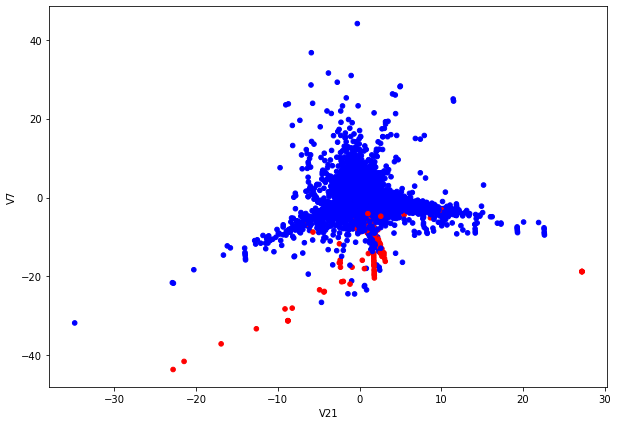

AUC for training set is 0.8743505776462106
AUC for validation set is 0.8846861493687617


In [35]:
# V21, V7
plt.figure(figsize = (10,7))
plt.scatter(X_train['V21'], X_train['V7'], marker="o", c = y_train.map({0:'blue', 1:'red'}), s=21)
plt.xlabel('V21')
plt.ylabel('V7')
plt.show()

# From the plot, there is 1 cluster (focus on valid transactions), need n_components = 1.
gm = GaussianMixture(n_components = 1, covariance_type = 'full',  random_state = 0)
gm.fit(X_train[['V21','V7']])

feature_train_V217 = X_train[['V21','V7']]
feature_val_V217 = X_val[['V21','V7']]
    
p_gm_train_V217 = gm.score_samples(feature_train_V217)
p_gm_val_V217 = gm.score_samples(feature_val_V217)
    
fpr_gm_train_V217, tpr_gm_train_V217, threshold_train_V217 = roc_curve(y_train, 1 - p_gm_train_V217)
fpr_gm_val_V217, tpr_gm_val_V217, threshold_val_V217 = roc_curve(y_val, 1 - p_gm_val_V217)
    
auc_train_V217 = auc(fpr_gm_train_V217, tpr_gm_train_V217)
auc_val_V217 = auc(fpr_gm_val_V217, tpr_gm_val_V217)

print('AUC for training set is', auc_train_V217)
print('AUC for validation set is', auc_val_V217)

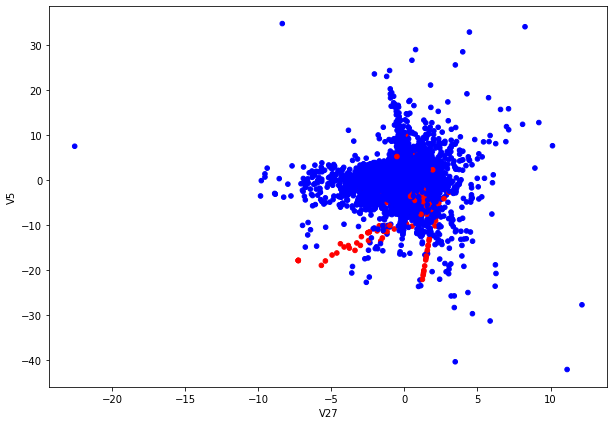

AUC for training set is 0.864232607519582
AUC for validation set is 0.8649271027573433


In [36]:
# V27, V5
plt.figure(figsize = (10,7))
plt.scatter(X_train['V27'], X_train['V5'], marker="o", c = y_train.map({0:'blue', 1:'red'}), s=21)
plt.xlabel('V27')
plt.ylabel('V5')
plt.show()

# From the plot, there are 3 clusters (focus on valid transactions), need n_components = 3.
gm = GaussianMixture(n_components = 3, covariance_type = 'full',  random_state = 0)
gm.fit(X_train[['V27','V5']])

feature_train_V275 = X_train[['V27','V5']]
feature_val_V275 = X_val[['V27','V5']]
    
p_gm_train_V275 = gm.score_samples(feature_train_V275)
p_gm_val_V275 = gm.score_samples(feature_val_V275)
    
fpr_gm_train_V275, tpr_gm_train_V275, threshold_train_V275 = roc_curve(y_train, 1 - p_gm_train_V275)
fpr_gm_val_V275, tpr_gm_val_V275, threshold_val_V275 = roc_curve(y_val, 1 - p_gm_val_V275)
    
auc_train_V275 = auc(fpr_gm_train_V275, tpr_gm_train_V275)
auc_val_V275 = auc(fpr_gm_val_V275, tpr_gm_val_V275)

print('AUC for training set is', auc_train_V275)
print('AUC for validation set is', auc_val_V275)

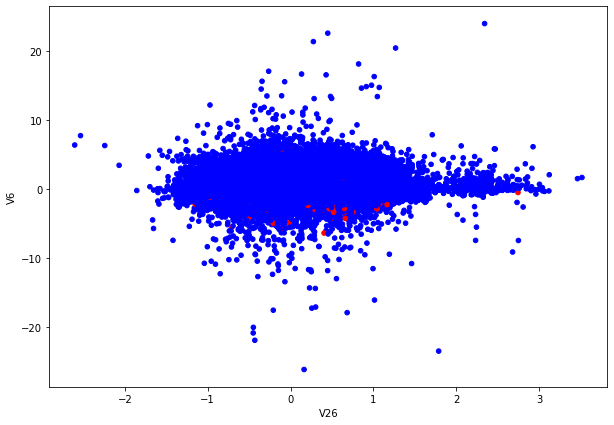

AUC for training set is 0.7065754536396887
AUC for validation set is 0.7236391428769408


In [37]:
# V26, V6
plt.figure(figsize = (10,7))
plt.scatter(X_train['V26'], X_train['V6'], marker="o", c = y_train.map({0:'blue', 1:'red'}), s=21)
plt.xlabel('V26')
plt.ylabel('V6')
plt.show()

# From the plot, there are 2 clusters (focus on valid transactions), need n_components = 2.
gm = GaussianMixture(n_components = 2, covariance_type = 'full',  random_state = 0)
gm.fit(X_train[['V26','V6']])

feature_train_V266 = X_train[['V26','V6']]
feature_val_V266 = X_val[['V26','V6']]
    
p_gm_train_V266 = gm.score_samples(feature_train_V266)
p_gm_val_V266 = gm.score_samples(feature_val_V266)
    
fpr_gm_train_V266, tpr_gm_train_V266, threshold_train_V266 = roc_curve(y_train, 1 - p_gm_train_V266)
fpr_gm_val_V266, tpr_gm_val_V266, threshold_val_V266 = roc_curve(y_val, 1 - p_gm_val_V266)
    
auc_train_V266 = auc(fpr_gm_train_V266, tpr_gm_train_V266)
auc_val_V266 = auc(fpr_gm_val_V266, tpr_gm_val_V266)

print('AUC for training set is', auc_train_V266)
print('AUC for validation set is', auc_val_V266)

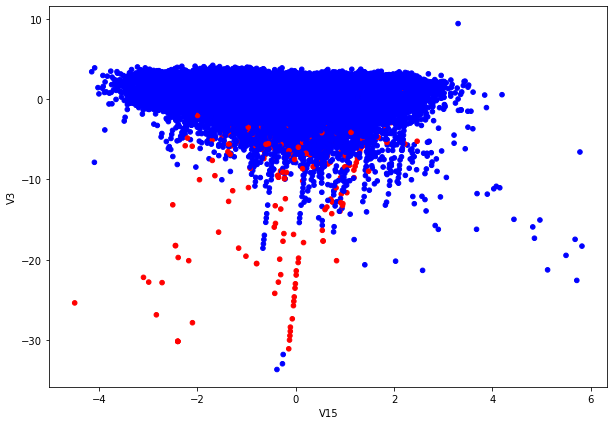

AUC for training set is 0.8910585947168013
AUC for validation set is 0.8525464133646496


In [38]:
# V15, V3
plt.figure(figsize = (10,7))
plt.scatter(X_train['V15'], X_train['V3'], marker="o", c = y_train.map({0:'blue', 1:'red'}), s=21)
plt.xlabel('V15')
plt.ylabel('V3')
plt.show()

# From the plot, there are 2 clusters (focus on valid transactions), need n_components = 2.
gm = GaussianMixture(n_components = 2, covariance_type = 'full',  random_state = 0)
gm.fit(X_train[['V15','V3']])

feature_train_V153 = X_train[['V15','V3']]
feature_val_V153 = X_val[['V15','V3']]
    
p_gm_train_V153 = gm.score_samples(feature_train_V153)
p_gm_val_V153 = gm.score_samples(feature_val_V153)
    
fpr_gm_train_V153, tpr_gm_train_V153, threshold_train_V153 = roc_curve(y_train, 1 - p_gm_train_V153)
fpr_gm_val_V153, tpr_gm_val_V153, threshold_val_V153 = roc_curve(y_val, 1 - p_gm_val_V153)
    
auc_train_V153 = auc(fpr_gm_train_V153, tpr_gm_train_V153)
auc_val_V153 = auc(fpr_gm_val_V153, tpr_gm_val_V153)

print('AUC for training set is', auc_train_V153)
print('AUC for validation set is', auc_val_V153)

In [39]:
print(max(auc_val_V217, auc_val_V275, auc_val_V266, auc_val_V153))
print(auc_val_V217)

0.8846861493687617
0.8846861493687617


So the set V21, V7 has the highest AUC on the validation set

Find a threshold to maximize your F1 Score on the validation set.[0.25]

In [40]:
F1_V217 = []

# The best F1 should occur in range[1,1000) 

for i in range(1,1000):
    tr = sorted(p_gm_val_V217)[i] #We sort the points by probability
    f1_V217 = f1_score(y_val, p_gm_val_V217 <= tr)
    F1_V217.append(f1_V217)

print('Max F1 score for set V21, V7 is', max(F1_V217))
optimal_threshold_V217 = sorted(p_gm_val_V217)[np.array(F1_V217).argmax()+1]
print('The optimal threshold for set V21, V7 is',sorted(p_gm_val_V217)[np.array(F1_V217).argmax()+1])

Max F1 score for set V21, V7 is 0.13392857142857142
The optimal threshold for set V21, V7 is -56.01036241460722


The optimal threshold to maximize F1 Score for set V21, V7 is -56.01036241460722

Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) [0.25]

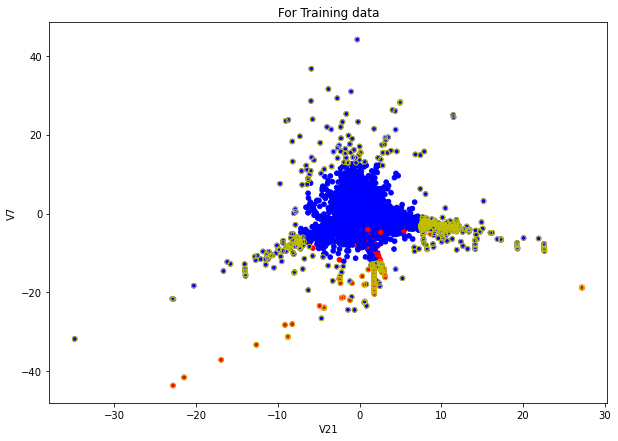

In [41]:
# V21, V7
plt.figure(figsize = (10,7))
plt.scatter(X_train['V21'], X_train['V7'], c = y_train.map({0:'blue', 1:'red'}), s=21)
outliers_train = np.nonzero(p_gm_train_V217 < optimal_threshold_V217)[0]
plt.scatter(np.array(X_train['V21'])[outliers_train],np.array(X_train['V7'])[outliers_train],marker="o",facecolor="none",edgecolor="y", s=21)
plt.xlabel('V21')
plt.ylabel('V7')
plt.title('For Training data')
plt.show()

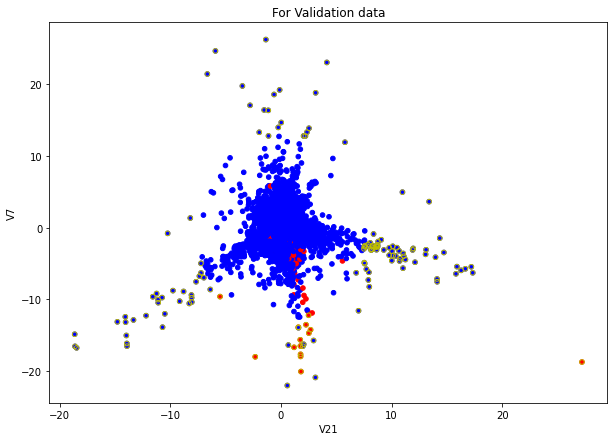

In [42]:
# V21, V7
plt.figure(figsize = (10,7))
plt.scatter(X_val['V21'], X_val['V7'], c = y_val.map({0:'blue', 1:'red'}), s=21)
outliers_val = np.nonzero(p_gm_val_V217 < optimal_threshold_V217)[0]
plt.scatter(np.array(X_val['V21'])[outliers_val],np.array(X_val['V7'])[outliers_val],marker="o",facecolor="none",edgecolor="y", s=21)
plt.xlabel('V21')
plt.ylabel('V7')
plt.title('For Validation data')
plt.show()

## **Part 4:  Two Gaussian model with single feature. [3 Marks]**
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.5]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.5]**
  5. Repeat the steps above for all the features. What is the best F1 Score, Precision and Recall that you get for training and validation? Which feature and what c? Show your results in a table. **[0.5]**
  6. Can we report AUC for this model? Why? **[0.5]**

In [43]:
# Set two dataset for non-fraudulent transactions and fraudulent transactions

# Non-fraudulent transactions 
X_train_nonfrau = X_train.copy()
y_train_nonfrau = y_train.copy()
X_val_nonfrau = X_val.copy()
y_val_nonfrau = y_val.copy()

X_train_nonfrau = X_train_nonfrau.join(y_train_nonfrau)
X_val_nonfrau = X_val_nonfrau.join(y_val_nonfrau)

X_train_nonfrau = X_train_nonfrau[X_train_nonfrau.iloc[:,-1] == 0]
X_train_nonfrau = X_train_nonfrau.drop(columns = ['Class'])

X_val_nonfrau = X_val_nonfrau[X_val_nonfrau.iloc[:,-1] == 0]
X_val_nonfrau = X_val_nonfrau.drop(columns = ['Class'])

y_train_nonfrau = y_train_nonfrau[y_train_nonfrau == 0]
y_val_nonfrau = y_val_nonfrau[y_val_nonfrau == 0]


# Fraudulent transactions
X_train_frau = X_train.copy()
y_train_frau = y_train.copy()
X_val_frau = X_val.copy()
y_val_frau = y_val.copy()

X_train_frau = X_train_frau.join(y_train_frau)
X_val_frau = X_val_frau.join(y_val_frau)

X_train_frau = X_train_frau[X_train_frau.iloc[:,-1] == 1]
X_train_frau = X_train_frau.drop(columns = ['Class'])

X_val_frau = X_val_frau[X_val_frau.iloc[:,-1] == 1]
X_val_frau = X_val_frau.drop(columns = ['Class'])

y_train_frau = y_train_frau[y_train_frau == 1]
y_val_frau = y_val_frau[y_val_frau == 1]

In [44]:
# 𝐺1, non-fraudulent transactions, V21
gm1 = GaussianMixture(n_components = 1, covariance_type = 'full',  random_state = 0)
gm1.fit(X_train_nonfrau['V21'].values.reshape(-1,1))
# Compute the score samples S1
p_gm1_val = gm1.score_samples(X_val['V21'].values.reshape(-1,1))

In [45]:
# 𝐺2, fraudulent transactions, V21
gm2 = GaussianMixture(n_components = 1, covariance_type = 'full',  random_state = 0)
gm2.fit(X_train_frau['V21'].values.reshape(-1,1))
# Compute the score samples S2
p_gm2_val = gm2.score_samples(X_val['V21'].values.reshape(-1,1))

4. Find an optimal c

In [46]:
F1_V21_c = []
for c in np.arange(0,10,0.1):
    f1_V21_c = f1_score(y_val, p_gm1_val < c * p_gm2_val)
    F1_V21_c.append(f1_V21_c)

In [47]:
c_list = np.arange(0,10,0.1)
optimal_c_V21 = c_list[np.array(F1_V21_c).argmax()]

print('The max validation set F1 Score for V21 is', max(F1_V21_c))
print('The optimal c for V21 is', optimal_c_V21)

The max validation set F1 Score for V21 is 0.03996366939146231
The optimal c for V21 is 1.4000000000000001


5. Repeat the steps above for all the features.

In [48]:
c_list = np.arange(0,10,0.1)

for i in range(28):
  
    # 𝐺1, non-fraudulent transactions
    gm1 = GaussianMixture(n_components = 1, covariance_type = 'full',  random_state = 0)
    gm1.fit(X_train_nonfrau.iloc[:,i].values.reshape(-1,1))
    # Compute the score samples S1
    p_gm1_val = gm1.score_samples(X_val.iloc[:,i].values.reshape(-1,1))
    
    
    
    # 𝐺2, fraudulent transactions
    gm2 = GaussianMixture(n_components = 1, covariance_type = 'full',  random_state = 0)
    gm2.fit(X_train_frau.iloc[:,i].values.reshape(-1,1))
    # Compute the score samples S2
    p_gm2_val = gm2.score_samples(X_val.iloc[:,i].values.reshape(-1,1))
    
    
    
    F1 = []
    for c in np.arange(0,10,0.1):
        f1 = f1_score(y_val, p_gm1_val < c * p_gm2_val)
        F1.append(f1)
    
    optimal_c = c_list[np.array(F1_V21_c).argmax()]

    print('Max validation set F1 Score for V', i+1, ':', max(F1))
    print('Optimal c for V', i+1, ':', optimal_c)

Max validation set F1 Score for V 1 : 0.1232876712328767
Optimal c for V 1 : 1.4000000000000001
Max validation set F1 Score for V 2 : 0.1553398058252427
Optimal c for V 2 : 1.4000000000000001
Max validation set F1 Score for V 3 : 0.25
Optimal c for V 3 : 1.4000000000000001
Max validation set F1 Score for V 4 : 0.3804347826086957
Optimal c for V 4 : 1.4000000000000001
Max validation set F1 Score for V 5 : 0.17187500000000003
Optimal c for V 5 : 1.4000000000000001
Max validation set F1 Score for V 6 : 0.10434782608695653
Optimal c for V 6 : 1.4000000000000001
Max validation set F1 Score for V 7 : 0.23204419889502764
Optimal c for V 7 : 1.4000000000000001
Max validation set F1 Score for V 8 : 0.08144796380090498
Optimal c for V 8 : 1.4000000000000001
Max validation set F1 Score for V 9 : 0.45161290322580644
Optimal c for V 9 : 1.4000000000000001
Max validation set F1 Score for V 10 : 0.4186046511627907
Optimal c for V 10 : 1.4000000000000001
Max validation set F1 Score for V 11 : 0.588235

6. Can we report AUC for this model? Why?

We can't report AUC for this model.
To build G1 and G2, we separated the fraud and non-fraud dataset to G1 and G2. As a result, we don’t have true positive (TP) and false positive(FP). This leads to we can’t have the AUC curve (AUC curve needs FP and TP). So we can't report AUC.

## **Part 5: Multivariate and Mixture of Gaussians Distribution [3 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) .
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score, Precision and Recall (after tuning the threshold) for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[3]**


**HINT !**

You might want to try a two gaussian model, multiple features, single component for valid transaction and multiple components for fraudulent ones! Why does it make sense to have multiple components for the fraudulent transactions?

Model 1,2,3, fit on all transaction data, with n_components = 1,2,3 respectively

Model 4,5,6, fit on non-fraudulent transactions, with n_components = 1,2,3 respectively 

We select the features that has high validation set F1 Score in part 4.  V9,V11,V12,V14

Model 7, fit on both classes data with feature V9,V11, one gaussian model

Model 8, fit on both classes data with feature V9,V11,V12, one gaussian model

Model 9, fit on both classes data with feature V9,V11,V12,V14, one gaussian model

Model 10, fit on feature V9,V11, two gaussian model

Model 11, fit on feature V9,V11,V12, two gaussian model

Model 12, fit on feature V9,V11,V12,V14, two gaussian model

In [49]:
# Model 1,2,3, fit on all transaction data

In [50]:
# Model 1, n_components=1, fit on all transaction data
gm_M1 = GaussianMixture(n_components = 1, covariance_type = 'full',  random_state = 0)
gm_M1.fit(X_train)
p_gm_train = gm_M1.score_samples(X_train)
p_gm_val = gm_M1.score_samples(X_val)
fpr_gm_train, tpr_gm_train, threshold_train = roc_curve(y_train, 1 - p_gm_train)
fpr_gm_val, tpr_gm_val, threshold_val = roc_curve(y_val, 1 - p_gm_val)
auc_train = auc(fpr_gm_train, tpr_gm_train)
auc_val = auc(fpr_gm_val, tpr_gm_val)
print('Model 1 train set AUC is',auc_train)
print('Model 1 validation set AUC is', auc_val)

# The best F1 should occur in range[1,1000) 
F1_train_M1 = []
F1_val_M1 = []
for i in range(1,1000):
    tr_train = sorted(p_gm_train)[i]
    tr_val = sorted(p_gm_val)[i]
    f1_train = f1_score(y_train, p_gm_train <= tr_train)
    f1_val = f1_score(y_val, p_gm_val <= tr_val)
    F1_train_M1.append(f1_train)
    F1_val_M1.append(f1_val)
print('Model 1 train set best F1 score is', max(F1_train_M1))
print('Model 1 validation set best F1 score is', max(F1_val_M1))

# Precision and Recall 
optimal_threshold_train_M1 = sorted(p_gm_train)[np.array(F1_train_M1).argmax()+1]
optimal_threshold_val_M1 = sorted(p_gm_val)[np.array(F1_val_M1).argmax()+1]

pre_train_M1 = precision_score(y_train, p_gm_train <= optimal_threshold_train_M1)
rec_train_M1 = recall_score(y_train, p_gm_train <= optimal_threshold_train_M1)

pre_val_M1 = precision_score(y_val, p_gm_val <= optimal_threshold_val_M1)
rec_val_M1 = recall_score(y_val, p_gm_val <= optimal_threshold_val_M1)

print('Model 1 train set Precision after tuing threshold is', pre_train_M1)
print('Model 1 train set Recall after tuing threshold is', rec_train_M1)

print('Model 1 validation set Precision after tuing threshold is', pre_val_M1)
print('Model 1 validation set Recall after tuing threshold is', rec_val_M1)

Model 1 train set AUC is 0.9521978442536915
Model 1 validation set AUC is 0.950449938929103
Model 1 train set best F1 score is 0.30095238095238097
Model 1 validation set best F1 score is 0.28125
Model 1 train set Precision after tuing threshold is 0.4114583333333333
Model 1 train set Recall after tuing threshold is 0.23723723723723725
Model 1 validation set Precision after tuing threshold is 0.4186046511627907
Model 1 validation set Recall after tuing threshold is 0.21176470588235294


In [51]:
# Model 2, n_components=2, fit on all transaction data
gm_M2 = GaussianMixture(n_components = 2, covariance_type = 'full',  random_state = 0)
gm_M2.fit(X_train)
p_gm_train = gm_M2.score_samples(X_train)
p_gm_val = gm_M2.score_samples(X_val)
fpr_gm_train, tpr_gm_train, threshold_train = roc_curve(y_train, 1 - p_gm_train)
fpr_gm_val, tpr_gm_val, threshold_val = roc_curve(y_val, 1 - p_gm_val)
auc_train = auc(fpr_gm_train, tpr_gm_train)
auc_val = auc(fpr_gm_val, tpr_gm_val)
print('Model 2 train set AUC is',auc_train)
print('Model 2 validation set AUC is', auc_val)

# The best F1 should occur in range[1,1000) 
F1_train_M2 = []
F1_val_M2 = []
for i in range(1,1000):
    tr_train = sorted(p_gm_train)[i]
    tr_val = sorted(p_gm_val)[i]
    f1_train = f1_score(y_train, p_gm_train <= tr_train)
    f1_val = f1_score(y_val, p_gm_val <= tr_val)
    F1_train_M2.append(f1_train)
    F1_val_M2.append(f1_val)
print('Model 2 train set best F1 score is', max(F1_train_M2))
print('Model 2 validation set best F1 score is', max(F1_val_M2))

# Precision and Recall 
optimal_threshold_train_M2 = sorted(p_gm_train)[np.array(F1_train_M2).argmax()+1]
optimal_threshold_val_M2 = sorted(p_gm_val)[np.array(F1_val_M2).argmax()+1]

pre_train_M2 = precision_score(y_train, p_gm_train <= optimal_threshold_train_M2)
rec_train_M2 = recall_score(y_train, p_gm_train <= optimal_threshold_train_M2)

pre_val_M2 = precision_score(y_val, p_gm_val <= optimal_threshold_val_M2)
rec_val_M2 = recall_score(y_val, p_gm_val <= optimal_threshold_val_M2)

print('Model 2 train set Precision after tuing threshold is', pre_train_M2)
print('Model 2 train set Recall after tuing threshold is', rec_train_M2)

print('Model 2 validation set Precision after tuing threshold is', pre_val_M2)
print('Model 2 validation set Recall after tuing threshold is', rec_val_M2)

Model 2 train set AUC is 0.9355311857124726
Model 2 validation set AUC is 0.9348766016243514
Model 2 train set best F1 score is 0.29277566539923955
Model 2 validation set best F1 score is 0.2727272727272727
Model 2 train set Precision after tuing threshold is 0.39896373056994816
Model 2 train set Recall after tuing threshold is 0.23123123123123124
Model 2 validation set Precision after tuing threshold is 0.3829787234042553
Model 2 validation set Recall after tuing threshold is 0.21176470588235294


In [52]:
# Model 3, n_components=3, fit on all transaction data
gm_M3 = GaussianMixture(n_components = 3, covariance_type = 'full',  random_state = 0)
gm_M3.fit(X_train)
p_gm_train = gm_M3.score_samples(X_train)
p_gm_val = gm_M3.score_samples(X_val)
fpr_gm_train, tpr_gm_train, threshold_train = roc_curve(y_train, 1 - p_gm_train)
fpr_gm_val, tpr_gm_val, threshold_val = roc_curve(y_val, 1 - p_gm_val)
auc_train = auc(fpr_gm_train, tpr_gm_train)
auc_val = auc(fpr_gm_val, tpr_gm_val)
print('Model 3 train set AUC is',auc_train)
print('Model 3 validation set AUC is', auc_val)

# The best F1 should occur in range[1,1000) 
F1_train_M3 = []
F1_val_M3 = []
for i in range(1,1000):
    tr_train = sorted(p_gm_train)[i]
    tr_val = sorted(p_gm_val)[i]
    f1_train = f1_score(y_train, p_gm_train <= tr_train)
    f1_val = f1_score(y_val, p_gm_val <= tr_val)
    F1_train_M3.append(f1_train)
    F1_val_M3.append(f1_val)
print('Model 3 train set best F1 score is', max(F1_train_M3))
print('Model 3 validation set best F1 score is', max(F1_val_M3))

# Precision and Recall 
optimal_threshold_train_M3 = sorted(p_gm_train)[np.array(F1_train_M3).argmax()+1]
optimal_threshold_val_M3 = sorted(p_gm_val)[np.array(F1_val_M3).argmax()+1]

pre_train_M3 = precision_score(y_train, p_gm_train <= optimal_threshold_train_M3)
rec_train_M3 = recall_score(y_train, p_gm_train <= optimal_threshold_train_M3)

pre_val_M3 = precision_score(y_val, p_gm_val <= optimal_threshold_val_M3)
rec_val_M3 = recall_score(y_val, p_gm_val <= optimal_threshold_val_M3)

print('Model 3 train set Precision after tuing threshold is', pre_train_M3)
print('Model 3 train set Recall after tuing threshold is', rec_train_M3)

print('Model 3 validation set Precision after tuing threshold is', pre_val_M3)
print('Model 3 validation set Recall after tuing threshold is', rec_val_M3)

Model 3 train set AUC is 0.9296407560761693
Model 3 validation set AUC is 0.9323638522342849
Model 3 train set best F1 score is 0.28417266187050366
Model 3 validation set best F1 score is 0.2589928057553957
Model 3 train set Precision after tuing threshold is 0.3542600896860987
Model 3 train set Recall after tuing threshold is 0.23723723723723725
Model 3 validation set Precision after tuing threshold is 0.3333333333333333
Model 3 validation set Recall after tuing threshold is 0.21176470588235294


In [53]:
# Set in a table
midx_123 = pd.MultiIndex(levels=[['Train', 'Validation'],
                             ['M1', 'M2', 'M3']],
                     codes=[[0, 0, 0, 1, 1, 1],
                            [0, 1, 2, 0, 1, 2]])
table_prf_123 = pd.DataFrame(index=midx_123, columns=['F1'],
                  data=[[max(F1_train_M1)], 
                        [max(F1_train_M2)], 
                        [max(F1_train_M3)], 
                        [max(F1_val_M1)],
                        [max(F1_val_M2)], 
                        [max(F1_val_M3)]])
print(table_prf_123)

                     F1
Train      M1  0.300952
           M2  0.292776
           M3  0.284173
Validation M1  0.281250
           M2  0.272727
           M3  0.258993


For Model 1,2,3 (fit on all transaction data and with n_components = 1,2,3 respectively), all the best F1 score are around 0.3 or below 0.3. 
This indicates all three models are not good. As n-components increases, the F1 score decreases.
In this three models, the Model 1 performs the best result. (All transaction data, All features, 1 Gaussian, n_components = 1)

In [54]:
# Model 4,5,6, fit on non-fraudulent transactions

In [55]:
# Model 4, n_components=1, fit on non-fraudulent transaction data
gm_M4 = GaussianMixture(n_components = 1, covariance_type = 'full',  random_state = 0)
gm_M4.fit(X_train_nonfrau)
p_gm_train = gm_M4.score_samples(X_train)
p_gm_val = gm_M4.score_samples(X_val)
fpr_gm_train, tpr_gm_train, threshold_train = roc_curve(y_train, 1 - p_gm_train)
fpr_gm_val, tpr_gm_val, threshold_val = roc_curve(y_val, 1 - p_gm_val)
auc_train = auc(fpr_gm_train, tpr_gm_train)
auc_val = auc(fpr_gm_val, tpr_gm_val)
print('Model 4 train set AUC is',auc_train)
print('Model 4 validation set AUC is', auc_val)

# The best F1 should occur in range[1,1000) 
F1_train_M4 = []
F1_val_M4 = []
for i in range(1,1000):
    tr_train = sorted(p_gm_train)[i]
    tr_val = sorted(p_gm_val)[i]
    f1_train = f1_score(y_train, p_gm_train <= tr_train)
    f1_val = f1_score(y_val, p_gm_val <= tr_val)
    F1_train_M4.append(f1_train)
    F1_val_M4.append(f1_val)
print('Model 4 train set best F1 score is', max(F1_train_M4))
print('Model 4 validation set best F1 score is', max(F1_val_M4))

# Precision and Recall 
optimal_threshold_train_M4 = sorted(p_gm_train)[np.array(F1_train_M4).argmax()+1]
optimal_threshold_val_M4 = sorted(p_gm_val)[np.array(F1_val_M4).argmax()+1]

pre_train_M4 = precision_score(y_train, p_gm_train <= optimal_threshold_train_M4)
rec_train_M4 = recall_score(y_train, p_gm_train <= optimal_threshold_train_M4)

pre_val_M4 = precision_score(y_val, p_gm_val <= optimal_threshold_val_M4)
rec_val_M4 = recall_score(y_val, p_gm_val <= optimal_threshold_val_M4)

print('Model 4 train set Precision after tuing threshold is', pre_train_M4)
print('Model 4 train set Recall after tuing threshold is', rec_train_M4)

print('Model 4 validation set Precision after tuing threshold is', pre_val_M4)
print('Model 4 validation set Recall after tuing threshold is', rec_val_M4)

Model 4 train set AUC is 0.9571265783885514
Model 4 validation set AUC is 0.955973726586473
Model 4 train set best F1 score is 0.5482866043613708
Model 4 validation set best F1 score is 0.5163934426229508
Model 4 train set Precision after tuing threshold is 0.56957928802589
Model 4 train set Recall after tuing threshold is 0.5285285285285285
Model 4 validation set Precision after tuing threshold is 0.39622641509433965
Model 4 validation set Recall after tuing threshold is 0.7411764705882353


In [56]:
# Model 5, n_components=2, fit on non-fraudulent transaction data
gm_M5 = GaussianMixture(n_components = 2, covariance_type = 'full',  random_state = 0)
gm_M5.fit(X_train_nonfrau)
p_gm_train = gm_M5.score_samples(X_train)
p_gm_val = gm_M5.score_samples(X_val)
fpr_gm_train, tpr_gm_train, threshold_train = roc_curve(y_train, 1 - p_gm_train)
fpr_gm_val, tpr_gm_val, threshold_val = roc_curve(y_val, 1 - p_gm_val)
auc_train = auc(fpr_gm_train, tpr_gm_train)
auc_val = auc(fpr_gm_val, tpr_gm_val)
print('Model 5 train set AUC is',auc_train)
print('Model 5 validation set AUC is', auc_val)

# The best F1 should occur in range[1,1000) 
F1_train_M5 = []
F1_val_M5 = []
for i in range(1,1000):
    tr_train = sorted(p_gm_train)[i]
    tr_val = sorted(p_gm_val)[i]
    f1_train = f1_score(y_train, p_gm_train <= tr_train)
    f1_val = f1_score(y_val, p_gm_val <= tr_val)
    F1_train_M5.append(f1_train)
    F1_val_M5.append(f1_val)
print('Model 5 train set best F1 score is', max(F1_train_M5))
print('Model 5 validation set best F1 score is', max(F1_val_M5))

# Precision and Recall 
optimal_threshold_train_M5 = sorted(p_gm_train)[np.array(F1_train_M5).argmax()+1]
optimal_threshold_val_M5 = sorted(p_gm_val)[np.array(F1_val_M5).argmax()+1]

pre_train_M5 = precision_score(y_train, p_gm_train <= optimal_threshold_train_M5)
rec_train_M5 = recall_score(y_train, p_gm_train <= optimal_threshold_train_M5)

pre_val_M5 = precision_score(y_val, p_gm_val <= optimal_threshold_val_M5)
rec_val_M5 = recall_score(y_val, p_gm_val <= optimal_threshold_val_M5)

print('Model 5 train set Precision after tuing threshold is', pre_train_M5)
print('Model 5 train set Recall after tuing threshold is', rec_train_M5)

print('Model 5 validation set Precision after tuing threshold is', pre_val_M5)
print('Model 5 validation set Recall after tuing threshold is', rec_val_M5)

Model 5 train set AUC is 0.9330214461444506
Model 5 validation set AUC is 0.9372135330212047
Model 5 train set best F1 score is 0.5318818040435459
Model 5 validation set best F1 score is 0.5
Model 5 train set Precision after tuing threshold is 0.5516129032258065
Model 5 train set Recall after tuing threshold is 0.5135135135135135
Model 5 validation set Precision after tuing threshold is 0.3742690058479532
Model 5 validation set Recall after tuing threshold is 0.7529411764705882


In [57]:
# Model 6, n_components=3, fit on non-fraudulent transaction data
gm_M6 = GaussianMixture(n_components = 3, covariance_type = 'full',  random_state = 0)
gm_M6.fit(X_train_nonfrau)
p_gm_train = gm_M6.score_samples(X_train)
p_gm_val = gm_M6.score_samples(X_val)
fpr_gm_train, tpr_gm_train, threshold_train = roc_curve(y_train, 1 - p_gm_train)
fpr_gm_val, tpr_gm_val, threshold_val = roc_curve(y_val, 1 - p_gm_val)
auc_train = auc(fpr_gm_train, tpr_gm_train)
auc_val = auc(fpr_gm_val, tpr_gm_val)
print('Model 6 train set AUC is',auc_train)
print('Model 6 validation set AUC is', auc_val)

# The best F1 should occur in range[1,1000) 
F1_train_M6 = []
F1_val_M6 = []
for i in range(1,1000):
    tr_train = sorted(p_gm_train)[i]
    tr_val = sorted(p_gm_val)[i]
    f1_train = f1_score(y_train, p_gm_train <= tr_train)
    f1_val = f1_score(y_val, p_gm_val <= tr_val)
    F1_train_M6.append(f1_train)
    F1_val_M6.append(f1_val)
print('Model 6 train set best F1 score is', max(F1_train_M6))
print('Model 6 validation set best F1 score is', max(F1_val_M6))

# Precision and Recall 
optimal_threshold_train_M6 = sorted(p_gm_train)[np.array(F1_train_M6).argmax()+1]
optimal_threshold_val_M6 = sorted(p_gm_val)[np.array(F1_val_M6).argmax()+1]

pre_train_M6 = precision_score(y_train, p_gm_train <= optimal_threshold_train_M6)
rec_train_M6 = recall_score(y_train, p_gm_train <= optimal_threshold_train_M6)

pre_val_M6 = precision_score(y_val, p_gm_val <= optimal_threshold_val_M6)
rec_val_M6 = recall_score(y_val, p_gm_val <= optimal_threshold_val_M6)

print('Model 6 train set Precision after tuing threshold is', pre_train_M6)
print('Model 6 train set Recall after tuing threshold is', rec_train_M6)

print('Model 6 validation set Precision after tuing threshold is', pre_val_M6)
print('Model 6 validation set Recall after tuing threshold is', rec_val_M6)

Model 6 train set AUC is 0.9313706476648194
Model 6 validation set AUC is 0.9400084185792045
Model 6 train set best F1 score is 0.5714285714285714
Model 6 validation set best F1 score is 0.5333333333333333
Model 6 train set Precision after tuing threshold is 0.5849056603773585
Model 6 train set Recall after tuing threshold is 0.5585585585585585
Model 6 validation set Precision after tuing threshold is 0.5052631578947369
Model 6 validation set Recall after tuing threshold is 0.5647058823529412


In [58]:
# Set in a table
midx_456 = pd.MultiIndex(levels=[['Train', 'Validation'],
                             ['M4', 'M5', 'M6']],
                     codes=[[0, 0, 0, 1, 1, 1],
                            [0, 1, 2, 0, 1, 2]])
table_prf_456 = pd.DataFrame(index=midx_456, columns=['F1'],
                  data=[[max(F1_train_M4)], 
                        [max(F1_train_M5)], 
                        [max(F1_train_M6)], 
                        [max(F1_val_M4)],
                        [max(F1_val_M5)], 
                        [max(F1_val_M6)]])
print(table_prf_456)

                     F1
Train      M4  0.548287
           M5  0.531882
           M6  0.571429
Validation M4  0.516393
           M5  0.500000
           M6  0.533333


For Model 4,5,6 (fit on non-fraudulent transaction data and with n_components = 1,2,3 respectively), all the best F1 score increase, compare to Model 1,2,3. 
This indicates fit only on non-fraudulent transaction data rather than all transactiondata is good and can make the model better. 
In Model 4,5,6, the Model 6 performs the best result. (Fit on non-fraudulent transaction data, All feature, 1 Gaussian, n_components = 3)

Model 7, fit on both classes data with feature V9,V11, one gaussian model

Model 8, fit on both classes data with feature V9,V11,V12, one gaussian model

Model 9, fit on both classes data with feature V9,V11,V12,V14, one gaussian model

For V9,V11, n_components = 1 is appropriate

V9,V11,V12, n_components = 3 is appropriate

V9,V11,V12,V14, n_components = 3 is appropriate

In [59]:
# Model 7, fit on both classes data with feature V9,V11
gm_M7 = GaussianMixture(n_components = 1, covariance_type = 'full',  random_state = 0)
gm_M7.fit(X_train[['V11','V9']])
p_gm_train = gm_M7.score_samples(X_train[['V11','V9']])
p_gm_val = gm_M7.score_samples(X_val[['V11','V9']])
fpr_gm_train, tpr_gm_train, threshold_train = roc_curve(y_train, 1 - p_gm_train)
fpr_gm_val, tpr_gm_val, threshold_val = roc_curve(y_val, 1 - p_gm_val)
auc_train = auc(fpr_gm_train, tpr_gm_train)
auc_val = auc(fpr_gm_val, tpr_gm_val)
print('Model 7 train set AUC is',auc_train)
print('Model 7 validation set AUC is', auc_val)

# The best F1 should occur in range[1,1000) 
F1_train_M7 = []
F1_val_M7 = []
for i in range(1,1000):
    tr_train = sorted(p_gm_train)[i]
    tr_val = sorted(p_gm_val)[i]
    f1_train = f1_score(y_train, p_gm_train <= tr_train)
    f1_val = f1_score(y_val, p_gm_val <= tr_val)
    F1_train_M7.append(f1_train)
    F1_val_M7.append(f1_val)
print('Model 7 train set best F1 score is', max(F1_train_M7))
print('Model 7 validation set best F1 score is', max(F1_val_M7))

# Precision and Recall 
optimal_threshold_train_M7 = sorted(p_gm_train)[np.array(F1_train_M7).argmax()+1]
optimal_threshold_val_M7 = sorted(p_gm_val)[np.array(F1_val_M7).argmax()+1]

pre_train_M7 = precision_score(y_train, p_gm_train <= optimal_threshold_train_M7)
rec_train_M7 = recall_score(y_train, p_gm_train <= optimal_threshold_train_M7)

pre_val_M7 = precision_score(y_val, p_gm_val <= optimal_threshold_val_M7)
rec_val_M7 = recall_score(y_val, p_gm_val <= optimal_threshold_val_M7)

print('Model 7 train set Precision after tuing threshold is', pre_train_M7)
print('Model 7 train set Recall after tuing threshold is', rec_train_M7)

print('Model 7 validation set Precision after tuing threshold is', pre_val_M7)
print('Model 7 validation set Recall after tuing threshold is', rec_val_M7)

Model 7 train set AUC is 0.8954080169243327
Model 7 validation set AUC is 0.9175186082661346
Model 7 train set best F1 score is 0.3365570599613153
Model 7 validation set best F1 score is 0.3211678832116789
Model 7 train set Precision after tuing threshold is 0.47282608695652173
Model 7 train set Recall after tuing threshold is 0.26126126126126126
Model 7 validation set Precision after tuing threshold is 0.4230769230769231
Model 7 validation set Recall after tuing threshold is 0.25882352941176473


In [60]:
# Model 8, fit on both classes data with feature V9,V11,V12
gm_M8 = GaussianMixture(n_components = 3, covariance_type = 'full',  random_state = 0)
gm_M8.fit(X_train[['V11','V9','V12']])
p_gm_train = gm_M8.score_samples(X_train[['V11','V9','V12']])
p_gm_val = gm_M8.score_samples(X_val[['V11','V9','V12']])
fpr_gm_train, tpr_gm_train, threshold_train = roc_curve(y_train, 1 - p_gm_train)
fpr_gm_val, tpr_gm_val, threshold_val = roc_curve(y_val, 1 - p_gm_val)
auc_train = auc(fpr_gm_train, tpr_gm_train)
auc_val = auc(fpr_gm_val, tpr_gm_val)
print('Model 8 train set AUC is',auc_train)
print('Model 8 validation set AUC is', auc_val)

# The best F1 should occur in range[1,1000) 
F1_train_M8 = []
F1_val_M8 = []
for i in range(1,1000):
    tr_train = sorted(p_gm_train)[i]
    tr_val = sorted(p_gm_val)[i]
    f1_train = f1_score(y_train, p_gm_train <= tr_train)
    f1_val = f1_score(y_val, p_gm_val <= tr_val)
    F1_train_M8.append(f1_train)
    F1_val_M8.append(f1_val)
print('Model 8 train set best F1 score is', max(F1_train_M8))
print('Model 8 validation set best F1 score is', max(F1_val_M8))

# Precision and Recall 
optimal_threshold_train_M8 = sorted(p_gm_train)[np.array(F1_train_M8).argmax()+1]
optimal_threshold_val_M8 = sorted(p_gm_val)[np.array(F1_val_M8).argmax()+1]

pre_train_M8 = precision_score(y_train, p_gm_train <= optimal_threshold_train_M8)
rec_train_M8 = recall_score(y_train, p_gm_train <= optimal_threshold_train_M8)

pre_val_M8 = precision_score(y_val, p_gm_val <= optimal_threshold_val_M8)
rec_val_M8 = recall_score(y_val, p_gm_val <= optimal_threshold_val_M8)

print('Model 8 train set Precision after tuing threshold is', pre_train_M8)
print('Model 8 train set Recall after tuing threshold is', rec_train_M8)

print('Model 8 validation set Precision after tuing threshold is', pre_val_M8)
print('Model 8 validation set Recall after tuing threshold is', rec_val_M8)

Model 8 train set AUC is 0.9332707511342718
Model 8 validation set AUC is 0.9417974183713256
Model 8 train set best F1 score is 0.49069373942470396
Model 8 validation set best F1 score is 0.4413793103448276
Model 8 train set Precision after tuing threshold is 0.562015503875969
Model 8 train set Recall after tuing threshold is 0.43543543543543545
Model 8 validation set Precision after tuing threshold is 0.5333333333333333
Model 8 validation set Recall after tuing threshold is 0.3764705882352941


In [61]:
# Model 9, fit on both classes data with feature V9,V11,V12,V14
gm_M9 = GaussianMixture(n_components = 3, covariance_type = 'full',  random_state = 0)
gm_M9.fit(X_train[['V11','V9','V12','V14']])
p_gm_train = gm_M9.score_samples(X_train[['V11','V9','V12','V14']])
p_gm_val = gm_M9.score_samples(X_val[['V11','V9','V12','V14']])
fpr_gm_train, tpr_gm_train, threshold_train = roc_curve(y_train, 1 - p_gm_train)
fpr_gm_val, tpr_gm_val, threshold_val = roc_curve(y_val, 1 - p_gm_val)
auc_train = auc(fpr_gm_train, tpr_gm_train)
auc_val = auc(fpr_gm_val, tpr_gm_val)
print('Model 9 train set AUC is',auc_train)
print('Model 9 validation set AUC is', auc_val)

# The best F1 should occur in range[1,1000) 
F1_train_M9 = []
F1_val_M9 = []
for i in range(1,1000):
    tr_train = sorted(p_gm_train)[i]
    tr_val = sorted(p_gm_val)[i]
    f1_train = f1_score(y_train, p_gm_train <= tr_train)
    f1_val = f1_score(y_val, p_gm_val <= tr_val)
    F1_train_M9.append(f1_train)
    F1_val_M9.append(f1_val)
print('Model 9 train set best F1 score is', max(F1_train_M9))
print('Model 9 validation set best F1 score is', max(F1_val_M9))

# Precision and Recall 
optimal_threshold_train_M9 = sorted(p_gm_train)[np.array(F1_train_M9).argmax()+1]
optimal_threshold_val_M9 = sorted(p_gm_val)[np.array(F1_val_M9).argmax()+1]

pre_train_M9 = precision_score(y_train, p_gm_train <= optimal_threshold_train_M9)
rec_train_M9 = recall_score(y_train, p_gm_train <= optimal_threshold_train_M9)

pre_val_M9 = precision_score(y_val, p_gm_val <= optimal_threshold_val_M9)
rec_val_M9 = recall_score(y_val, p_gm_val <= optimal_threshold_val_M9)

print('Model 9 train set Precision after tuing threshold is', pre_train_M9)
print('Model 9 train set Recall after tuing threshold is', rec_train_M9)

print('Model 9 validation set Precision after tuing threshold is', pre_val_M9)
print('Model 9 validation set Recall after tuing threshold is', rec_val_M9)

Model 9 train set AUC is 0.9603816165318411
Model 9 validation set AUC is 0.9570857236823733
Model 9 train set best F1 score is 0.5544871794871795
Model 9 validation set best F1 score is 0.5316455696202531
Model 9 train set Precision after tuing threshold is 0.5945017182130584
Model 9 train set Recall after tuing threshold is 0.5195195195195195
Model 9 validation set Precision after tuing threshold is 0.5753424657534246
Model 9 validation set Recall after tuing threshold is 0.49411764705882355


In [62]:
# Set in a table
midx_789 = pd.MultiIndex(levels=[['Train', 'Validation'],
                             ['M7', 'M8', 'M9']],
                     codes=[[0, 0, 0, 1, 1, 1],
                            [0, 1, 2, 0, 1, 2]])
table_prf_789 = pd.DataFrame(index=midx_789, columns=['F1'],
                  data=[[max(F1_train_M7)], 
                        [max(F1_train_M8)], 
                        [max(F1_train_M9)], 
                        [max(F1_val_M7)],
                        [max(F1_val_M8)], 
                        [max(F1_val_M9)]])
print(table_prf_789)

                     F1
Train      M7  0.336557
           M8  0.490694
           M9  0.554487
Validation M7  0.321168
           M8  0.441379
           M9  0.531646


For Model 7,8,9 (fit on both classes data with increaing features),

Compare to Model 1,2,3, respectively, all models' the best F1 score increase.
This means Model 7,8,9 is better than Model 1,2,3, respectively.
Less features but useful features, can make the model better and increases the F1 score.

Compare to Model 4,5,6, Model 7,8,9 are not as good as Model 4,5,6. Only Model 9's performance (best F1 score) is near to the Model 6's performance (best F1 score).
This indicates fit only on non-fraudulent transaction data rather than all transactiondata is still good and can make the model better. 

In Model 7,8,9, the Model 9 performs the best result. (Fit on both classes data, Feature V9,V11,V12,V14, 1 Gaussian, n_components = 3)

Model 10, fit on non-fraudulent transaction data with feature V9,V11, two gaussian model

Model 11, fit on non-fraudulent transaction data with feature V9,V11,V12, two gaussian model

Model 12, fit on non-fraudulent transaction data with feature V9,V11,V12,V14, two gaussian model

In [63]:
c_list = np.arange(0,10,0.1)

In [64]:
# Model 10, fit on both classes data with feature V11,V9, two gaussian model

# 𝐺1, non-fraudulent transactions, V11, V9
gm_M101 = GaussianMixture(n_components = 1, covariance_type = 'full',  random_state = 0)
gm_M101.fit(X_train_nonfrau[['V11','V9']])
p_gm_M101_train = gm_M101.score_samples(X_train[['V11','V9']])
p_gm_M101_val = gm_M101.score_samples(X_val[['V11','V9']])

# 𝐺2, fraudulent transactions, V11, V9
gm_M102 = GaussianMixture(n_components = 1, covariance_type = 'full',  random_state = 0)
gm_M102.fit(X_train_frau[['V11','V9']])
p_gm_M102_train = gm_M102.score_samples(X_train[['V11','V9']])
p_gm_M102_val = gm_M102.score_samples(X_val[['V11','V9']])

F1_train_M10 = []
F1_val_M10 = []

for c in np.arange(0,10,0.1):
    f1_train_M10 = f1_score(y_train, p_gm_M101_train < c * p_gm_M102_train)
    f1_val_M10 = f1_score(y_val, p_gm_M101_val < c * p_gm_M102_val)
    
    F1_train_M10.append(f1_train_M10)
    F1_val_M10.append(f1_val_M10)

print('The max train set F1 Score for Model 10 is', max(F1_train_M10))
print('The max validation set F1 Score for Model 10 is', max(F1_val_M10))

# Precision and Recall 
optimal_threshold_train_M101 = p_gm_M101_train[np.array(F1_train_M10).argmax()]
optimal_threshold_val_M101 = p_gm_M101_val[np.array(F1_val_M10).argmax()]

optimal_threshold_train_M102 = p_gm_M102_train[np.array(F1_train_M10).argmax()]
optimal_threshold_val_M102 = p_gm_M102_val[np.array(F1_val_M10).argmax()]


# G1
pre_train_M101 = precision_score(y_train, p_gm_M101_train <= optimal_threshold_train_M101)
rec_train_M101 = recall_score(y_train, p_gm_M101_train <= optimal_threshold_train_M101)
pre_val_M101 = precision_score(y_val, p_gm_M101_val <= optimal_threshold_val_M101)
rec_val_M101 = recall_score(y_val, p_gm_M101_val <= optimal_threshold_val_M101)

print('Model 10 G1 train set Precision after tuing threshold is', pre_train_M101)
print('Model 10 G1 train set Recall after tuing threshold is', rec_train_M101)

print('Model 10 G1 validation set Precision after tuing threshold is', pre_val_M101)
print('Model 10 G1 validation set Recall after tuing threshold is', rec_val_M101)

# G2
pre_train_M102 = precision_score(y_train, p_gm_M102_train <= optimal_threshold_train_M102)
rec_train_M102 = recall_score(y_train, p_gm_M102_train <= optimal_threshold_train_M102)
pre_val_M102 = precision_score(y_val, p_gm_M102_val <= optimal_threshold_val_M102)
rec_val_M102 = recall_score(y_val, p_gm_M102_val <= optimal_threshold_val_M102)

print('Model 10 G2 train set Precision after tuing threshold is', pre_train_M102)
print('Model 10 G2 train set Recall after tuing threshold is', rec_train_M102)

print('Model 10 G2 validation set Precision after tuing threshold is', pre_val_M102)
print('Model 10 G2 validation set Recall after tuing threshold is', rec_val_M102)

The max train set F1 Score for Model 10 is 0.6617647058823529
The max validation set F1 Score for Model 10 is 0.6293706293706294
Model 10 G1 train set Precision after tuing threshold is 0.002315470098498211
Model 10 G1 train set Recall after tuing threshold is 0.9579579579579579
Model 10 G1 validation set Precision after tuing threshold is 0.0021711990446724202
Model 10 G1 validation set Recall after tuing threshold is 0.9411764705882353
Model 10 G2 train set Precision after tuing threshold is 0.0010226353465512769
Model 10 G2 train set Recall after tuing threshold is 0.2012012012012012
Model 10 G2 validation set Precision after tuing threshold is 0.0005999376064889252
Model 10 G2 validation set Recall after tuing threshold is 0.29411764705882354


In [65]:
# Model 11, fit on both classes data with feature V9,V11,V12, two gaussian model

# 𝐺1, non-fraudulent transactions, V11, V9, V12
gm_M111 = GaussianMixture(n_components = 3, covariance_type = 'full',  random_state = 0)
gm_M111.fit(X_train_nonfrau[['V11','V9','V12']])
p_gm_M111_train = gm_M111.score_samples(X_train[['V11','V9','V12']])
p_gm_M111_val = gm_M111.score_samples(X_val[['V11','V9','V12']])

# 𝐺2, fraudulent transactions, V11, V9, V12
gm_M112 = GaussianMixture(n_components = 1, covariance_type = 'full',  random_state = 0)
gm_M112.fit(X_train_frau[['V11','V9','V12']])
p_gm_M112_train = gm_M112.score_samples(X_train[['V11','V9','V12']])
p_gm_M112_val = gm_M112.score_samples(X_val[['V11','V9','V12']])

F1_train_M11 = []
F1_val_M11 = []

for c in np.arange(0,10,0.1):
    f1_train_M11 = f1_score(y_train, p_gm_M111_train < c * p_gm_M112_train)
    f1_val_M11 = f1_score(y_val, p_gm_M111_val < c * p_gm_M112_val)
    
    F1_train_M11.append(f1_train_M11)
    F1_val_M11.append(f1_val_M11)

print('The max train set F1 Score for Model 11 is', max(F1_train_M11))
print('The max validation set F1 Score for Model 11 is', max(F1_val_M11))

# Precision and Recall 
optimal_threshold_train_M111 = p_gm_M111_train[np.array(F1_train_M11).argmax()]
optimal_threshold_val_M111 = p_gm_M111_val[np.array(F1_val_M11).argmax()]

optimal_threshold_train_M112 = p_gm_M112_train[np.array(F1_train_M11).argmax()]
optimal_threshold_val_M112 = p_gm_M112_val[np.array(F1_val_M11).argmax()]


# G1
pre_train_M111 = precision_score(y_train, p_gm_M111_train <= optimal_threshold_train_M111)
rec_train_M111 = recall_score(y_train, p_gm_M111_train <= optimal_threshold_train_M111)
pre_val_M111 = precision_score(y_val, p_gm_M111_val <= optimal_threshold_val_M111)
rec_val_M111 = recall_score(y_val, p_gm_M111_val <= optimal_threshold_val_M111)

print('Model 11 G1 train set Precision after tuing threshold is', pre_train_M111)
print('Model 11 G1 train set Recall after tuing threshold is', rec_train_M111)

print('Model 11 G1 validation set Precision after tuing threshold is', pre_val_M111)
print('Model 11 G1 validation set Recall after tuing threshold is', rec_val_M111)

# G2
pre_train_M112 = precision_score(y_train, p_gm_M112_train <= optimal_threshold_train_M112)
rec_train_M112 = recall_score(y_train, p_gm_M112_train <= optimal_threshold_train_M112)
pre_val_M112 = precision_score(y_val, p_gm_M112_val <= optimal_threshold_val_M112)
rec_val_M112 = recall_score(y_val, p_gm_M112_val <= optimal_threshold_val_M112)

print('Model 11 G2 train set Precision after tuing threshold is', pre_train_M112)
print('Model 11 G2 train set Recall after tuing threshold is', rec_train_M112)

print('Model 11 G2 validation set Precision after tuing threshold is', pre_val_M112)
print('Model 11 G2 validation set Recall after tuing threshold is', rec_val_M112)

The max train set F1 Score for Model 11 is 0.5840407470288626
The max validation set F1 Score for Model 11 is 0.5298013245033113
Model 11 G1 train set Precision after tuing threshold is 0.0024002618467469177
Model 11 G1 train set Recall after tuing threshold is 0.990990990990991
Model 11 G1 validation set Precision after tuing threshold is 0.003339041095890411
Model 11 G1 validation set Recall after tuing threshold is 0.9176470588235294
Model 11 G2 train set Precision after tuing threshold is 0.001983487466838569
Model 11 G2 train set Recall after tuing threshold is 0.24024024024024024
Model 11 G2 validation set Precision after tuing threshold is 0.000686655985351339
Model 11 G2 validation set Recall after tuing threshold is 0.17647058823529413


In [66]:
# Model 12, fit on both classes data with feature V9,V11,V12,V14, two gaussian model

# 𝐺1, non-fraudulent transactions, V9,V11,V12,V14
gm_M121 = GaussianMixture(n_components = 3, covariance_type = 'full',  random_state = 0)
gm_M121.fit(X_train_nonfrau[['V11','V9','V12','V14']])
p_gm_M121_train = gm_M121.score_samples(X_train[['V11','V9','V12','V14']])
p_gm_M121_val = gm_M121.score_samples(X_val[['V11','V9','V12','V14']])

# 𝐺2, fraudulent transactions, V9,V11,V12,V14
gm_M122 = GaussianMixture(n_components = 1, covariance_type = 'full',  random_state = 0)
gm_M122.fit(X_train_frau[['V11','V9','V12','V14']])
p_gm_M122_train = gm_M122.score_samples(X_train[['V11','V9','V12','V14']])
p_gm_M122_val = gm_M122.score_samples(X_val[['V11','V9','V12','V14']])

F1_train_M12 = []
F1_val_M12 = []

for c in np.arange(0,10,0.1):
    f1_train_M12 = f1_score(y_train, p_gm_M121_train < c * p_gm_M122_train)
    f1_val_M12 = f1_score(y_val, p_gm_M121_val < c * p_gm_M122_val)
    
    F1_train_M12.append(f1_train_M12)
    F1_val_M12.append(f1_val_M12)

print('The max train set F1 Score for Model 12 is', max(F1_train_M12))
print('The max validation set F1 Score for Model 12 is', max(F1_val_M12))

# Precision and Recall 
optimal_threshold_train_M121 = p_gm_M121_train[np.array(F1_train_M12).argmax()]
optimal_threshold_val_M121 = p_gm_M121_val[np.array(F1_val_M12).argmax()]

optimal_threshold_train_M122 = p_gm_M122_train[np.array(F1_train_M12).argmax()]
optimal_threshold_val_M122 = p_gm_M122_val[np.array(F1_val_M12).argmax()]


# G1
pre_train_M121 = precision_score(y_train, p_gm_M121_train <= optimal_threshold_train_M121)
rec_train_M121 = recall_score(y_train, p_gm_M121_train <= optimal_threshold_train_M121)
pre_val_M121 = precision_score(y_val, p_gm_M121_val <= optimal_threshold_val_M121)
rec_val_M121 = recall_score(y_val, p_gm_M121_val <= optimal_threshold_val_M121)

print('Model 12 G1 train set Precision after tuing threshold is', pre_train_M121)
print('Model 12 G1 train set Recall after tuing threshold is', rec_train_M121)

print('Model 12 G1 validation set Precision after tuing threshold is', pre_val_M121)
print('Model 12 G1 validation set Recall after tuing threshold is', rec_val_M121)

# G2
pre_train_M122 = precision_score(y_train, p_gm_M122_train <= optimal_threshold_train_M122)
rec_train_M122 = recall_score(y_train, p_gm_M122_train <= optimal_threshold_train_M122)
pre_val_M122 = precision_score(y_val, p_gm_M122_val <= optimal_threshold_val_M122)
rec_val_M122 = recall_score(y_val, p_gm_M122_val <= optimal_threshold_val_M122)

print('Model 12 G2 train set Precision after tuing threshold is', pre_train_M122)
print('Model 12 G2 train set Recall after tuing threshold is', rec_train_M122)

print('Model 12 G2 validation set Precision after tuing threshold is', pre_val_M122)
print('Model 12 G2 validation set Recall after tuing threshold is', rec_val_M122)

The max train set F1 Score for Model 12 is 0.7682333873581848
The max validation set F1 Score for Model 12 is 0.7586206896551726
Model 12 G1 train set Precision after tuing threshold is 0.032472657571315816
Model 12 G1 train set Recall after tuing threshold is 0.8648648648648649
Model 12 G1 validation set Precision after tuing threshold is 0.0017140898183064792
Model 12 G1 validation set Recall after tuing threshold is 1.0
Model 12 G2 train set Precision after tuing threshold is 0.002570694087403599
Model 12 G2 train set Recall after tuing threshold is 0.08708708708708708
Model 12 G2 validation set Precision after tuing threshold is 0.0010427946897685798
Model 12 G2 validation set Recall after tuing threshold is 0.3058823529411765


In [67]:
# Set in a table
midx_101112 = pd.MultiIndex(levels=[['Train', 'Validation'],
                             ['M10', 'M11', 'M12']],
                     codes=[[0, 0, 0, 1, 1, 1],
                            [0, 1, 2, 0, 1, 2]])
table_prf_101112 = pd.DataFrame(index=midx_101112, columns=['F1'],
                  data=[[max(F1_train_M10)], 
                        [max(F1_train_M11)], 
                        [max(F1_train_M12)], 
                        [max(F1_val_M10)],
                        [max(F1_val_M11)], 
                        [max(F1_val_M12)]])
print(table_prf_101112)

                      F1
Train      M10  0.661765
           M11  0.584041
           M12  0.768233
Validation M10  0.629371
           M11  0.529801
           M12  0.758621


For Model 10,11,12 (fit on with increaing features, two gaussian model), 

Compare to model 7,8,9, respectively, all models' the best F1 score increase. This means Model 10,11,12 is better than Model 7,8,9, respectively.
Less and Useful features with using two Gaussian models can make the model better and increases the F1 score.
And we can say Model 10,11,12 are the top 3 models in all models we have (Model 1-12).

In Model 10,11,12, the Model 12 performs the best result. (Fit on Feature V9,V11,V12,V14, 2 Gaussian models, n_components = 3)

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**


Model 12 works best in all models.

In [68]:
# Non-fraudulent transactions 
X_train_nonfrau = X_train.copy()
y_train_nonfrau = y_train.copy()
X_val_nonfrau = X_val.copy()
y_val_nonfrau = y_val.copy()

X_train_nonfrau = X_train_nonfrau.join(y_train_nonfrau)
X_val_nonfrau = X_val_nonfrau.join(y_val_nonfrau)

X_train_nonfrau = X_train_nonfrau[X_train_nonfrau.iloc[:,-1] == 0]
X_train_nonfrau = X_train_nonfrau.drop(columns = ['Class'])

X_val_nonfrau = X_val_nonfrau[X_val_nonfrau.iloc[:,-1] == 0]
X_val_nonfrau = X_val_nonfrau.drop(columns = ['Class'])

y_train_nonfrau = y_train_nonfrau[y_train_nonfrau == 0]
y_val_nonfrau = y_val_nonfrau[y_val_nonfrau == 0]


In [69]:
# Non-fraudulent transactions 
X_test_nonfrau = X_test.copy()
y_test_nonfrau = y_test.copy()

X_test_nonfrau = X_test_nonfrau.join(y_test_nonfrau)
X_test_nonfrau = X_test_nonfrau[X_test_nonfrau.iloc[:,-1] == 0]
X_test_nonfrau = X_test_nonfrau.drop(columns = ['Class'])

y_test_nonfrau = y_test_nonfrau[y_test_nonfrau == 0]


# Fraudulent transactions
X_test_frau = X_test.copy()
y_test_frau = y_test.copy()

X_test_frau = X_test_frau.join(y_test_frau)
X_test_frau = X_test_frau[X_test_frau.iloc[:,-1] == 1]
X_test_frau = X_test_frau.drop(columns = ['Class'])

y_test_frau = y_test_frau[y_test_frau == 1]

In [70]:
# 𝐺1, non-fraudulent transactions, V9,V11,V12,V14
gm_M121_test = GaussianMixture(n_components = 3, covariance_type = 'full',  random_state = 0)
gm_M121_test.fit(X_train_nonfrau[['V11','V9','V12','V14']])
p_gm_M121_test = gm_M121_test.score_samples(X_test[['V11','V9','V12','V14']])


# 𝐺2, fraudulent transactions, V9,V11,V12,V14
gm_M122_test = GaussianMixture(n_components = 1, covariance_type = 'full',  random_state = 0)
gm_M122_test.fit(X_train_frau[['V11','V9','V12','V14']])
p_gm_M122_test = gm_M122_test.score_samples(X_test[['V11','V9','V12','V14']])


F1_test_M12 = []
Precision_test_M12 = []
Recall_test_M12 = []

for c in np.arange(0,10,0.1):
    f1_test_M12 = f1_score(y_test, p_gm_M121_test < c * p_gm_M122_test)
    F1_test_M12.append(f1_test_M12)
    
    precision_test_M12 = precision_score(y_test, p_gm_M121_test < c * p_gm_M122_test)
    Precision_test_M12.append(precision_test_M12)
    
    recall_test_M12 = recall_score(y_test, p_gm_M121_test < c * p_gm_M122_test)
    Recall_test_M12.append(recall_test_M12)

In [71]:
print('The max test set F1 Score for Model 12 is', max(F1_test_M12))
print('The corresponding Precision is', Precision_test_M12[np.array(F1_test_M12).argmax()])
print('The corresponding Recall is', Recall_test_M12[np.array(F1_test_M12).argmax()])

The max test set F1 Score for Model 12 is 0.7862068965517242
The corresponding Precision is 0.8028169014084507
The corresponding Recall is 0.7702702702702703


In [72]:
# Put in a table
table_test = pd.DataFrame({'F1 score':F1_test_M12,'Precision':Precision_test_M12,'Recall':Recall_test_M12})
table_test

,F1 score,Precision,Recall
0,0.003458,0.001732,1.000000
1,0.003458,0.001732,1.000000
2,0.003458,0.001732,1.000000
3,0.003458,0.001732,1.000000
4,0.004187,0.002098,0.972973
...,...,...,...
95,0.326087,0.833333,0.202703
96,0.326087,0.833333,0.202703
97,0.326087,0.833333,0.202703
98,0.326087,0.833333,0.202703
